In [1]:
!pip install langchain_community
!pip install replicate
!pip install -U langchain langchain-community langchain-experimental replicate
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.4 MB/s eta 0:00:00


In [2]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
from google.colab import files
import pandas as pd

# Set the API token
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}


llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters,
)

In [4]:
# Ganti 'namafile.xlsx' dengan nama file kamu
df = pd.read_excel('ulasan_toko_tokopedia.xlsx')
df.head()
df

,web-scraper-order,web-scraper-start-url,tgl,rating,nama,review,next
0,1751887744-1,https://www.tokopedia.com/kahfofficial/review,Hari ini,5,T***h,Keren,NaN
1,1751887744-2,https://www.tokopedia.com/kahfofficial/review,Hari ini,5,O***a,Sesuaiiiiiii,NaN
2,1751887744-3,https://www.tokopedia.com/kahfofficial/review,Hari ini,5,M***h,Kurir nya ramah barang ORI,NaN
3,1751887744-4,https://www.tokopedia.com/kahfofficial/review,Hari ini,5,C***v,Belum di coba muda²han cocok,NaN
4,1751887744-5,https://www.tokopedia.com/kahfofficial/review,Hari ini,5,Xrisser,"dapat promo, beli 4 barang, harga di bawah 100...",NaN
...,...,...,...,...,...,...,...
5205,1751887744-5206,https://www.tokopedia.com/kahfofficial/review,3 minggu lalu,5,S***k,Mantap pokonya,NaN
5206,1751887744-5207,https://www.tokopedia.com/kahfofficial/review,3 minggu lalu,2,A***m,bgus bgt mantap,NaN
5207,1751887744-5208,https://www.tokopedia.com/kahfofficial/review,3 minggu lalu,5,K***i,Paket datang lengkap,NaN
5208,1751887744-5209,https://www.tokopedia.com/kahfofficial/review,3 minggu lalu,5,Z***p,Maaf baru kasih ulasan baru pertama kali memak...,NaN


In [5]:
import pandas as pd
df = df = pd.read_excel("ulasan_toko_tokopedia.xlsx")
from textblob import TextBlob
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)



> Entering new AgentExecutor chain...
Thought: To create the required bar chart, we need to first identify valid and invalid entries based on the presence of reviews. Valid entries have non-missing reviews, while invalid entries have missing reviews (NaN). We will then count these entries and use matplotlib to create the bar chart with specified colors and labels.

Action: python_repl_ast

Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Count valid and invalid entries
valid_count = len(df[~df['review'].isna()])
invalid_count = len(df[df['review'].isna()])

# Create bar chart
plt.bar(['Valid', 'Invalid'], [valid_count, invalid_count], color=['green', 'red'])
plt.ylabel('Count')
plt.title('Valid vs Invalid Entries')
plt.show()
```



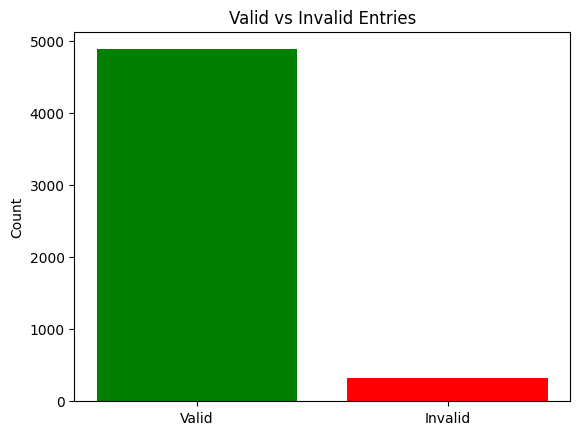

ModelError: Director: unexpected error handling prediction (E8765)

In [6]:
agent.invoke({
  "Please display a bar chart showing the number of valid data entries and the number of invalid data entries (due to missing reviews). Use green color for the valid bar and red color for the invalid bar. Include a label above each bar indicating the count of valid and invalid entries."
})




> Entering new AgentExecutor chain...


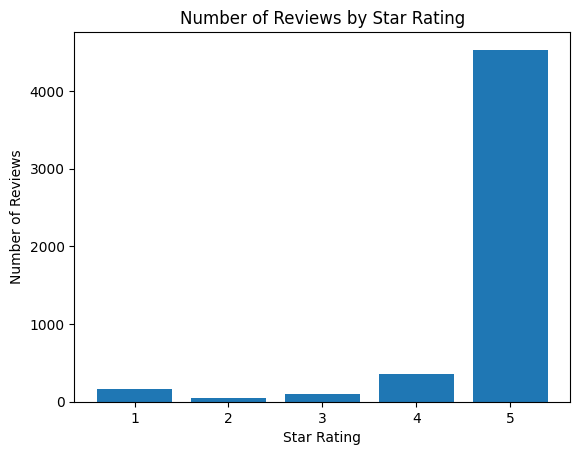

Thought: To create a bar chart showing the number of reviews for each star rating, I need to count the occurrences of each rating and then plot them. I will use the `value_counts()` function from pandas to count the ratings and `matplotlib.pyplot` for plotting.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt

# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()

# Prepare data for the bar chart
ratings = rating_counts.index
review_numbers = rating_counts.values

# Create a bar chart
plt.bar(ratings, review_numbers)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Star Rating')
plt.show()
```



ModelError: Director: unexpected error handling prediction (E9243)

In [7]:
agent.invoke({
  "Create a bar chart showing the number of reviews for each star rating from 1 to 5. Label each bar with the number of reviews it represents."
})


In [8]:
agent.invoke({
  "Tolong ringkas ulasan dari data yang saya telah berikan dan ambil poin-poin pentingnya, termasuk kelebihan, kekurangan, dan sentimen umum pelanggan."
})


Output streaming akan dipotong hingga 5000 baris terakhir.
- Trimakasih barang sudah sampai 🙏👌
- Mntp
- nan
- Ya
- recommended seller
- Semoga cocok sama kulit ku
- Semoga cocok
- smga cccok
- Mantap barang ok dan kecepatan pengiriman ok
- Mantul
- Barang smpai... buwat miswa,pertama kali beli di toko ini , pengemasan baik,harga murce,pengriman cepat ,auto lngganan di toko ini makasih ya kk...
- Yang warna hitam... kegunaan nya apa kakak....dan dipakai kapan kak....dan warna coklat juga....kak
- Ternyata ukuranya kecil ya
- alhamdulilah sampai
- oke barang mendarat dgn selamat🔥🔥✨
- Bagus
- produk sesuai dengan deskripsi, kualitas produk sangat terjamin, botol kemasan produk proper, packaging sangat aman, pengiriman tepat waktu
- H
- B aj
- bagusss mencerahkan wajah enakk ke kulittt harus langganan siii
- Sesui gambar
- mantap
- Sesuai pesenan ...semoga cocok
- Mantapppp sesuai pesanan, packing nya rapi
Kualitas produk: Baguss
- Mantep pengiriman cepat
- Barang sesuai pesanan, packing r

ModelError: Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)